In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter, gaussian_filter
from skimage.filters import sobel
from skimage import img_as_float
from scipy.ndimage import binary_closing
from scipy.interpolate import griddata
import json
import tifffile as tf
import seaborn as sns
import sys
sys.path.append("../../network_extraction/src/")
from real_data import write_tiff
sys.path.append("../src/")
from surface_extraction import *

In [3]:
configs_path = "../configs.json"
with open(configs_path, "r") as f:
    configs = json.load(f)

In [22]:
image = tf.imread(configs["CD44"])[:, :1000, :1000]

In [23]:
image.shape

(71, 1000, 1000)

In [24]:
smoothed_image = smooth_image_in_xy(image)
binary_image = image > 6 # TODO thresholding?
top_layer = get_top_layer(binary_image)

In [34]:
top_layer_3d = get_layer_in_3d(top_layer, image.shape)

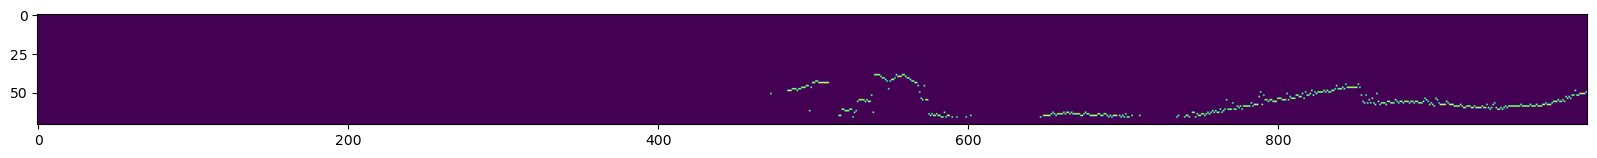

In [35]:
plt.figure(figsize=(20,20))
img = top_layer_3d[:, 500, :]
img = img.astype(float) / np.max(img)
img *= 255
plt.imshow(img.astype(int))

In [27]:
write_tiff(configs, "column-wise-first-gradient.tif", top_layer_3d)

In [37]:
piece_wise_smoothed_top_layer = piecewiese_smooth_layer_in_xy(top_layer, sigma=5)
piece_wise_smoothed_top_layer_3d = get_layer_in_3d(piece_wise_smoothed_top_layer, image.shape)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 411/411 [00:01<00:00, 320.33it/s]
/data_nfs/je30bery/synovium_surface/notebooks/../src/surface_extraction.py:69: RuntimeWarning: invalid value encountered in cast
  return smoothed_top_layer_piecewise


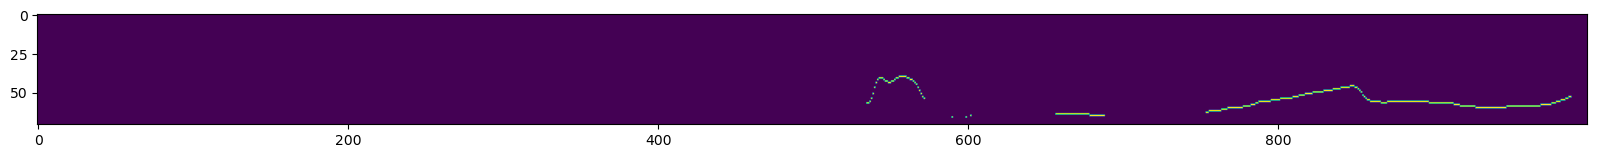

In [38]:
plt.figure(figsize=(20,20))
img = piece_wise_smoothed_top_layer_3d[:, 500, :]
img = img.astype(float) / np.max(img)
img *= 255
plt.imshow(img.astype(int))

In [39]:
write_tiff(configs, "piecewise-smoothed-column-wise-first-gradient.tif", piece_wise_smoothed_top_layer_3d)

In [40]:
top_layer_interp = interpolate_top_layer(top_layer, image.shape)
interp_top_layer_3d = get_layer_in_3d(top_layer_interp, image.shape)

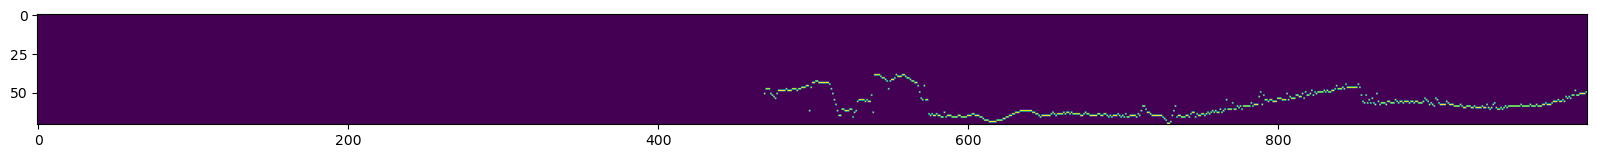

In [41]:
plt.figure(figsize=(20,20))
img = interp_top_layer_3d[:, 500, :]
img = img.astype(float) / np.max(img)
img *= 255
plt.imshow(img.astype(int))

In [42]:
smoothed_top_layer = smooth_layer_in_xy(top_layer_interp, sigma=5)
smoothed_top_layer_3d = get_layer_in_3d(smoothed_top_layer, image.shape)

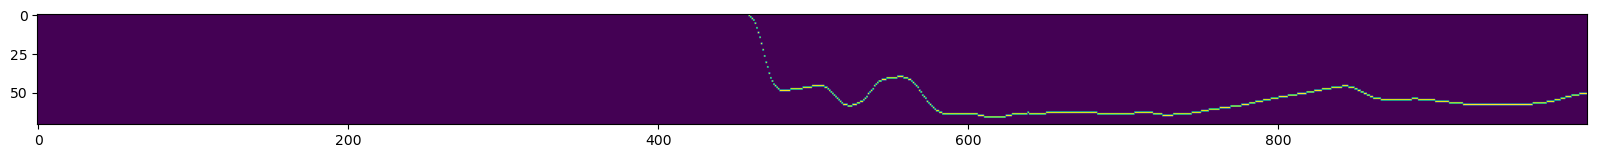

In [43]:
plt.figure(figsize=(20,20))
img = smoothed_top_layer_3d[:, 500, :]
img = img.astype(float) / np.max(img)
img *= 255
plt.imshow(img.astype(int))

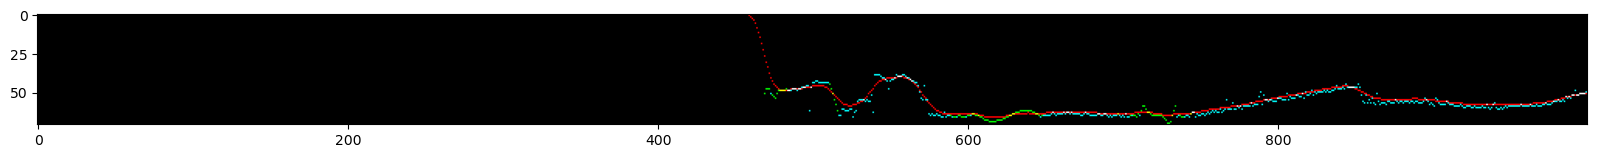

In [44]:
plt.figure(figsize=(20,20))
r = smoothed_top_layer_3d[:, 500, :]
r = 255 * r.astype(float) / np.max(r)

g = interp_top_layer_3d[:, 500, :]
g = 255 * g.astype(float) / np.max(g)

b = top_layer_3d[:, 500, :]
b = 255 * b.astype(float) / np.max(b)

plt.imshow(np.array([r, g, b]).transpose((1, 2, 0)).astype(int))

In [45]:
write_tiff(configs, "interpolated_surface.tif", interp_top_layer_3d)

In [46]:
write_tiff(configs, "smoothed_interpolated_surface.tif", smoothed_top_layer_3d)